In [1]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt

In [0]:
time0 = time.time()

In [3]:
#Getting the Data
(x_train,Y_train),(x_test,Y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Processing the Data

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
Y_train = Y_train.reshape(Y_train.shape[0],1)

x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
Y_test = Y_test.reshape(Y_test.shape[0],1)

In [0]:
Classes = 10
#Converting into One Hot Vector
y_train = np.zeros([Y_train.shape[0], Classes])
for i in range(Y_train.shape[0]):
        y_train[i][Y_train[i]] = 1

y_test = np.zeros([Y_test.shape[0], Classes])
for i in range(Y_test.shape[0]):
        y_test[i][Y_test[i]] = 1

# Defining the Model

In [7]:
fcmodel = tf.keras.Sequential()

#Defining the input shape in the first layer of the model
fcmodel.add(tf.keras.layers.Dense(1024, activation='relu',input_shape=(784,)))
#Adding more layers
fcmodel.add(tf.keras.layers.Dense(512, activation='relu'))
fcmodel.add(tf.keras.layers.Dense(256, activation='relu'))
#Adding dropout
fcmodel.add(tf.keras.layers.Dropout(0.5))
#Final output
fcmodel.add(tf.keras.layers.Dense(10, activation='softmax'))

#Model Summary
fcmodel.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Compiling the model and defining loss and optimizer
fcmodel.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Training

In [9]:
#Training the model 
fcmodel.fit(x_train, y_train, batch_size=64, epochs=60)

Train on 60000 samples
Epoch 1/60
60000/60000 [==============================] - 6s 94us/sample - loss: 0.8601 - acc: 0.7603
Epoch 2/60
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3674 - acc: 0.8954
Epoch 3/60
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2942 - acc: 0.9154
Epoch 4/60
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2498 - acc: 0.9286
Epoch 5/60
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2194 - acc: 0.9377
Epoch 6/60
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1968 - acc: 0.9435
Epoch 7/60
60000/60000 [==============================] - 5s 75us/sample - loss: 0.1782 - acc: 0.9492
Epoch 8/60
60000/60000 [==============================] - 4s 75us/sample - loss: 0.1630 - acc: 0.9536
Epoch 9/60
60000/60000 [==============================] - 5s 75us/sample - loss: 0.1486 - acc: 0.9575
Epoch 10/60
60000/60000 [==============================] - 

In [10]:
#Evaluating the model
accuracy_test = fcmodel.evaluate(x_test, y_test, verbose=0)
accuracy_train = fcmodel.evaluate(x_train, y_train, verbose=0)

#Printing test accuracy
print('Test accuracy is :', '{:.2f}'.format(accuracy_test[1]*100))
#Printing training accuracy
print('Train accuracy is :', '{:.2f}'.format(accuracy_train[1]*100))

Test accuracy is : 98.20
Train accuracy is : 99.94


In [0]:
time1 = time.time()

In [12]:
print("Time taken = ", '{:.3f}'.format((time1-time0)/60), "minutes")

Time taken =  4.793 minutes


# Visualizing Predictions

In [0]:
pred = fcmodel.predict(x_test)

In [0]:
Predicted = np.zeros(pred.shape[0])
for i in range(pred.shape[0]):
    Predicted[i] = np.argmax(pred[i][:])

Expected = np.zeros(y_test.shape[0])
for i in range(y_test.shape[0]):
    Expected[i] = np.argmax(y_test[i][:])
    
for i in range(pred.shape[0]):
    if Predicted[i] == Expected[i]:
        same = i
    else:
        diff = i
        break    

In [0]:
test_image = x_test.reshape(x_test.shape[0], 28, 28)

Predicted =  0.0
Expected =  0.0


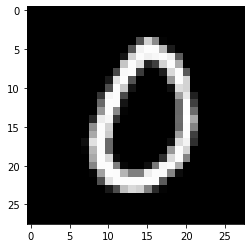

In [16]:
print("Predicted = ", Predicted[same])
print("Expected = ", Expected[same])
plt.imshow(test_image[same], cmap = 'gray')

Predicted =  4.0
Expected =  2.0


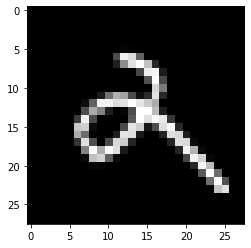

In [17]:
print("Predicted = ", Predicted[diff])
print("Expected = ", Expected[diff])
plt.imshow(test_image[diff], cmap = 'gray')